# WITH PANDAS AND MATPLOTLIB

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [4]:
kill.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
kill.groupby("gender").count()

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,107,107,107,107,107,104,98,107,107,107,107,104,107
M,2428,2428,2428,2428,2419,2354,2242,2428,2428,2428,2428,2366,2428


In [6]:
killcount = kill.groupby("gender").count().index
killcount
#ax.bar(kill.gender.value_counts()index,kill.gender.value_counts().values)
#hocanin kodu :) ben neler yapmisim?????

Index(['F', 'M'], dtype='object', name='gender')

In [7]:
killnum = list(kill.groupby("gender")["id"].count())
killnum    

[107, 2428]

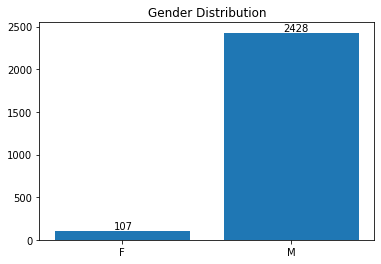

In [12]:
fig, ax = plt.subplots()

ax.bar(killcount,killnum)
ax.set_title("Gender Distribution")

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.35,p.get_height()+15))

#plt.text(x=0, y = gen_dis[0], s=gen_dis[0], ha ="center")  #muhammed hocanin
#plt.text(x=1, y = gen_dis[1], s=gen_dis[1], ha ="center")

#ax.bar_label(a, padding=..)  #Adsum hocanin

#for dongusu hocanin 
plt.show()

barlarin yer degistirmesi

sort_values(ascending = False) ya da True duruma göre ayarlayabilirsiniz
MAtPlotLib in kendi sort parametresi yok o yüzden sıralı göndermekte fayda var

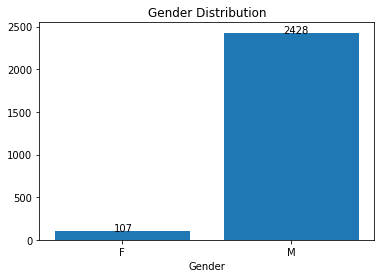

In [14]:
#hocanin bir diger yer degistirme kodu
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index[::-1],kill.gender.value_counts().values[::-1])
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.35,p.get_height()+0.15));

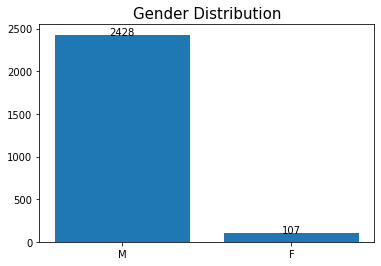

In [13]:
# solution-2
bars = kill['gender'].value_counts()
positions = kill['gender'].unique()
plt.bar(positions, bars)
plt.title('Gender Distribution', fontdict={'fontsize':15})
plt.text(x=0, y = bars[0], s = bars[0], ha="center")
plt.text(x=1, y = bars[1], s = bars[1], ha="center")
plt.show()

In [ ]:
kill.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 2: Plot 7 most common kill weapons

In [ ]:
kill.armed.value_counts().head(7)  #value_counts kullanmak burada aklima geldi

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [16]:
silahlar = kill.armed.value_counts().head(7).index
silahlar

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete'],
      dtype='object')

In [25]:
silah_sayilari = list(kill.armed.value_counts().head(7))
silah_sayilari

[1398, 373, 177, 171, 117, 104, 18]

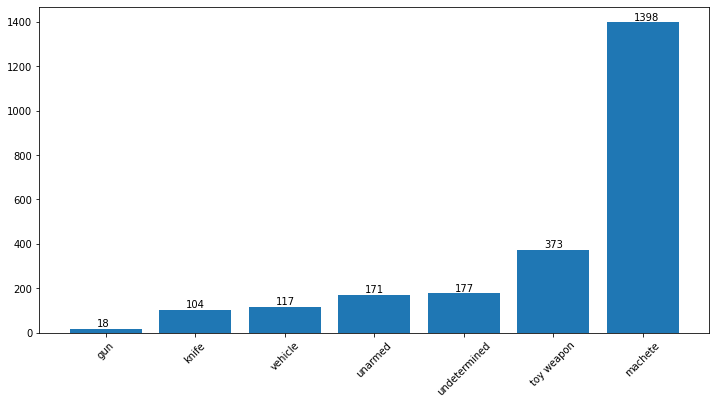

In [37]:
# with matplotlib
fig, ax= plt.subplots(figsize=(12,6))
ax.bar(silahlar[::-1],height=silah_sayilari[::-1])   #bu baya iyi 

ax.set_xticklabels(silahlar, rotation=45)   #hocanin kodu 

for p in ax.patches:      #cok guzel ya bildigin copy paste
    ax.annotate((p.get_height()),(p.get_x()+0.3,p.get_height()+10));

plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [38]:
kill.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [39]:
kill["age_cat"] = kill.age.apply(lambda x: "above25" if x>=25 else "below25")
#ben baya ugrastim ama lambda kullanmak aklima gelmedi 
#hocanin....
#lambda nelere kadirsin

In [40]:
kill.head(4)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25


In [41]:
age_class= kill.age_cat.value_counts()
age_class     #drop na yapmadik

above25    2008
below25     527
Name: age_cat, dtype: int64

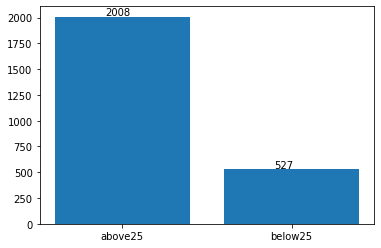

In [48]:
# with matplotlib
fig , ax = plt.subplots()
ax.bar(age_class.index,age_class.values)

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.3,p.get_height()+15));


plt.show()             #yavas yavas kapiyom bu isi :)

In [ ]:
kill.head(6)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,53.0
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,47.0
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,NaN
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,32.0
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,39.0
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,NaN


## 4: Plot number of killed poeple by race

In [ ]:
races = kill.race.value_counts().index
races

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [49]:
kill.race.value_counts(dropna=False)   #aydinlandim  #nan lari goremiyordum

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [ ]:
killed_people = list(kill.race.value_counts())
killed_people

[1201, 618, 423, 39, 31, 28]

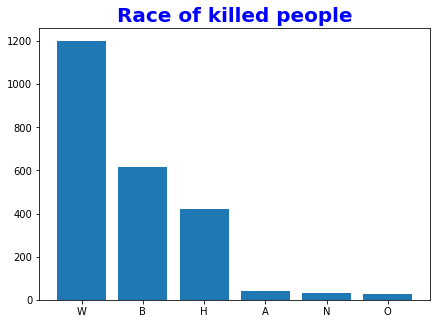

In [ ]:
# with matplotlib
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(races,killed_people)
ax.set_title("Race of killed people",color="blue",size=20,fontweight="bold")
plt.show()    #Hepsi bana ait :)

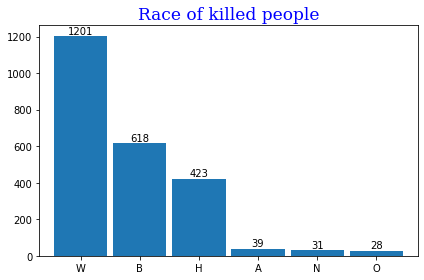

In [50]:
r=kill['race'].value_counts()    #nadire hocanin kodu
x=kill['race'].value_counts()
y=kill['race'].value_counts()
r.plot.bar(width=0.9, align='center')
font1 = {'family':'serif','color':'blue','size':17}
plt.title("Race of killed people", fontdict = font1)
plt.xticks(rotation=0)
for i in range(len(x)):
    plt.text(i,y[i], y[i],ha='center',va='bottom')
plt.tight_layout()

In [ ]:
kill.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,53.0
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,47.0
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,NaN
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,32.0
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,39.0


## 5: Killed People According to Races (Pie Chart)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
races = kill.race.value_counts().unique()
races

array([1201,  618,  423,   39,   31,   28], dtype=int64)

In [51]:
kill.race.value_counts(dropna=False)   #su dropnayi artik kolay kolay unutmam


W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [52]:
kill.dropna(inplace=True)   #nan lardan kurtulduk

In [53]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [54]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [55]:
indexler =kill.race.value_counts(dropna=False).index

indexler

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [56]:
degerler =kill.race.value_counts(dropna=False).values
degerler

array([1168,  592,  401,   36,   29,   28], dtype=int64)

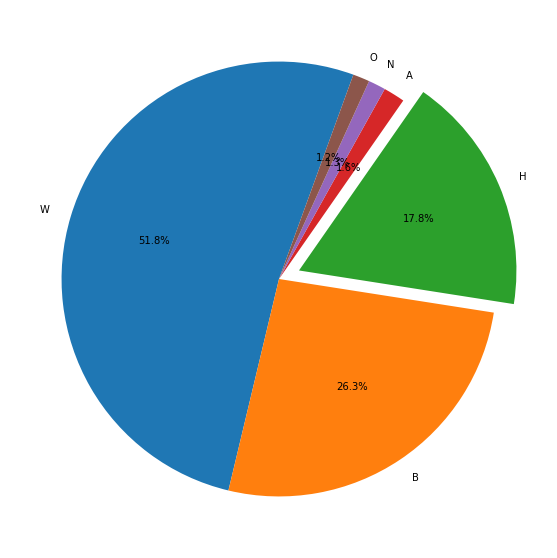

In [ ]:
# matplotlib



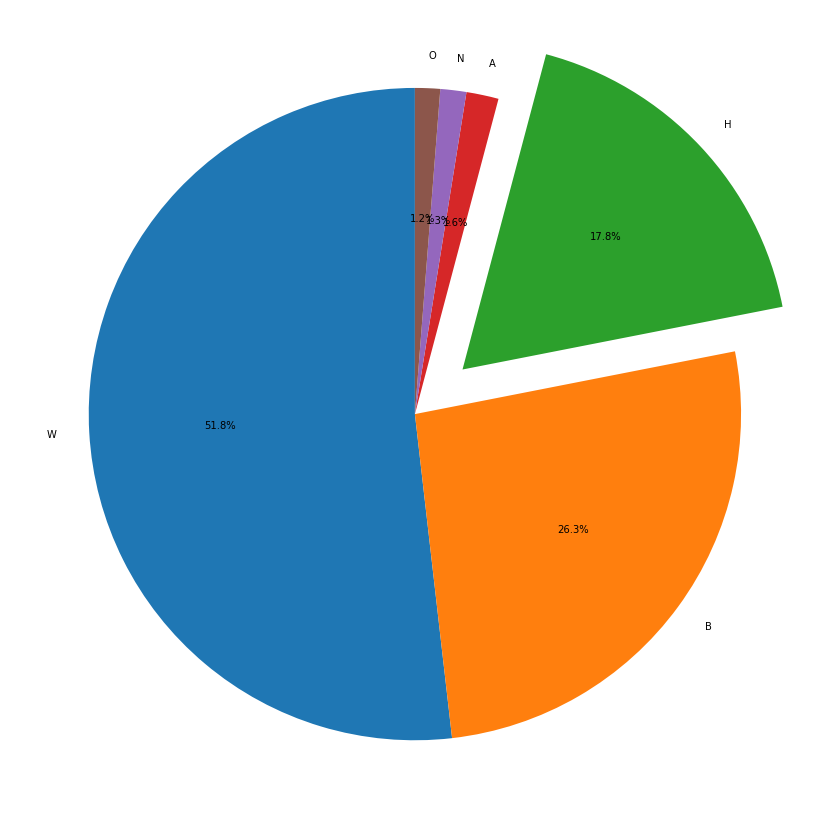

In [66]:
explode = (0,0,0.2,0,0,0)   # ucuncu siradaki h yi disari cikardik

fig, ax= plt.subplots(figsize=(15,15))
ax.pie(x=degerler,explode=explode,labels=indexler,autopct="%.1f%%",
        startangle=90);   #autopct standart.Ezberlemek lazim